In [1]:
#importing the libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
#importing the dataset

In [37]:
dataset = pd.read_csv('Position_Salaries.csv')
x= dataset.iloc[:,1:-1].values
y= dataset.iloc[:,-1].values

In [38]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [39]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [40]:
# Need to transform this one diamentional array to two diamentional 
y=y.reshape(len(y),1) # reshape y to 2D array 
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [41]:
#feature scaling

In [42]:
from sklearn.preprocessing import StandardScaler
standardScalerX=StandardScaler()
standardScalerY=StandardScaler()
x=standardScalerX.fit_transform(x)
y=standardScalerY.fit_transform(y)

In [43]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [44]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [45]:
#training the SVR model on whole dataset

In [49]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #RBF Kernel is recommended 
regressor.fit(x,y) #warning that y should b passed as 1 D array not 2 D

C:\Users\denni\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [5]:
#predicting result

In [54]:
standardScalerY.inverse_transform(regressor.predict(standardScalerX.transform([[6.5]]))) # standardScalerY reverse transform 

array([170370.0204065])

#visualising the SVR results

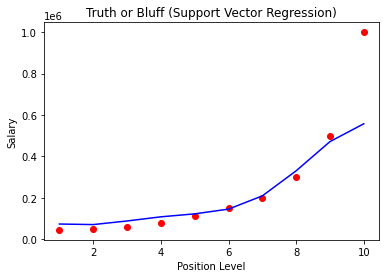

In [58]:
plt.scatter(standardScalerX.inverse_transform(x),standardScalerY.inverse_transform(y),color = 'red')
plt.plot(standardScalerX.inverse_transform(x),standardScalerY.inverse_transform(regressor.predict(x)),color ='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#visualising the SVR results for higher resolution and smoother curve

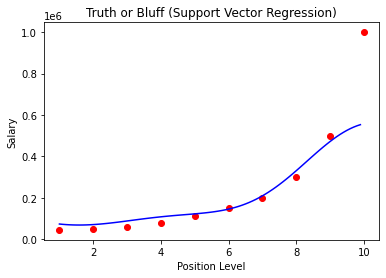

In [63]:
x_grid=np.arange(min(standardScalerX.inverse_transform(x)),max(standardScalerX.inverse_transform(x)),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(standardScalerX.inverse_transform(x),standardScalerY.inverse_transform(y),color = 'red')
plt.plot(x_grid,standardScalerY.inverse_transform(regressor.predict(standardScalerX.transform(x_grid))),color ='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#outlier will not be well predicted(caught) by SVR. IT is good for most of dataset - linear and non-linear based on kernels. Check diff SVR kernels 